<AxesSubplot: xlabel='Datetime'>

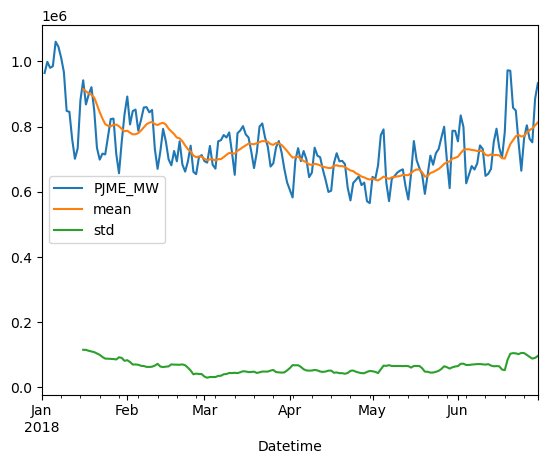

In [5]:
import pandas as pd

data = pd.read_csv('../datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['PJME_MW'] = data['PJME_MW'].shift()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

<AxesSubplot: xlabel='Datetime'>

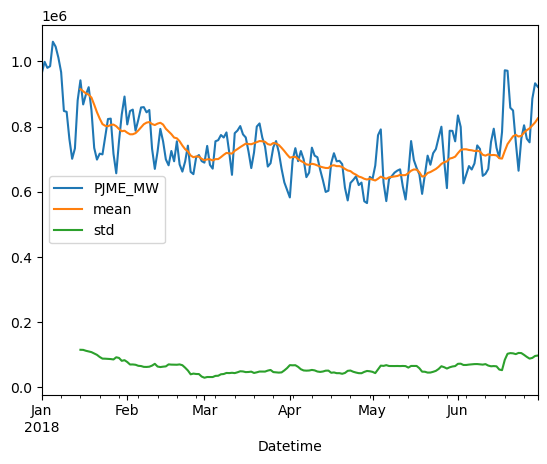

In [3]:
import pandas as pd

data = pd.read_csv('../datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
# data = data.shift()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('../datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1D').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)

print("Средний объём электропотребления в день:", test['PJME_MW'].mean())
pred_previous = test - test.shift(fill_value=train.iloc[len(train) - 1, 0])
print("MAE:", mean_absolute_error(y_true=test, y_pred=pred_previous))

Средний объём электропотребления в день: 745523.4529702971
MAE: 746098.8333333334


In [12]:
train.iloc[len(train) - 1, 0]


732847.0

In [15]:
import pandas as pd
import numpy as np


data = pd.read_csv('../datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1D').sum()


def make_features(dataa):
    dataa['year'] = dataa.index.year
    dataa['month'] = dataa.index.month
    dataa['day'] = dataa.index.month
    dataa['dayofweek'] = dataa.index.dayofweek


make_features(data)
print(data.head())

             PJME_MW  year  month  day  dayofweek
Datetime                                         
2002-01-01  714857.0  2002      1    1          1
2002-01-02  822277.0  2002      1    1          2
2002-01-03  828285.0  2002      1    1          3
2002-01-04  809171.0  2002      1    1          4
2002-01-05  729723.0  2002      1    1          5


In [17]:
data['tmp'] = data['PJME_MW'].rolling(5).mean()
data


,PJME_MW,year,month,day,dayofweek,tmp
Datetime,,,,,,
2002-01-01,714857.0,2002,1,1,1,NaN
2002-01-02,822277.0,2002,1,1,2,NaN
2002-01-03,828285.0,2002,1,1,3,NaN
2002-01-04,809171.0,2002,1,1,4,NaN
2002-01-05,729723.0,2002,1,1,5,780862.6
...,...,...,...,...,...,...
2018-07-30,790978.0,2018,7,7,0,844938.0
2018-07-31,828938.0,2018,7,7,1,827264.0
2018-08-01,941539.0,2018,8,8,2,832252.6
